In [1]:
%load_ext autoreload
%autoreload 2

import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from tqdm import tqdm

from tensorflow.keras.datasets import cifar10

from matplotlib import cm
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [16, 7]

# fix gpu memory management 
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

# enable reproducibility
SEED = 42
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Loading and normalizing the dataset

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


# Visualizing some samples

In [3]:
def preview(size):
    labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    fig, ax = plt.subplots(size, size)
    for i in range(size):
        for j in range(size):
            idx = np.random.choice(len(x_train))
            ax[i, j].imshow(x_train[idx])
            ax[i, j].axis('off')
            ax[i, j].set(title=labels[y_train[idx, 0]])

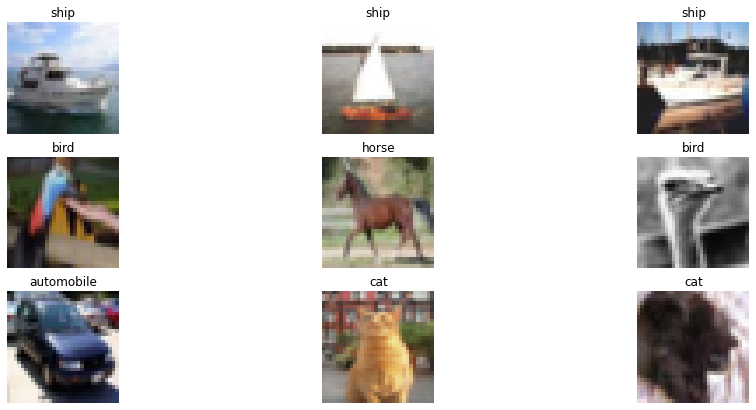

In [4]:
preview(3)

# Training a baseline model

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 75s 2ms/sample - loss: 1.8656 - accuracy: 0.3438 - f1_score: 0.3304 - val_loss: 1.8178 - val_accuracy: 0.3704 - val_f1_score: 0.3427
Epoch 2/100
50000/50000 [==============================] - 74s 1ms/sample - loss: 1.2281 - accuracy: 0.5586 - f1_score: 0.5452 - val_loss: 1.1815 - val_accuracy: 0.5810 - val_f1_score: 0.5635
Epoch 3/100
50000/50000 [==============================] - 74s 1ms/sample - loss: 0.9959 - accuracy: 0.6484 - f1_score: 0.6363 - val_loss: 1.1063 - val_accuracy: 0.6209 - val_f1_score: 0.5945
Epoch 4/100
50000/50000 [==============================] - 74s 1ms/sample - loss: 0.8619 - accuracy: 0.6995 - f1_score: 0.6896 - val_loss: 0.9060 - val_accuracy: 0.6818 - val_f1_score: 0.6678
Epoch 5/100
50000/50000 [==============================] - 74s 1ms/sample - loss: 0.7821 - accuracy: 0.7282 - f1_score: 0.7176 - val_loss: 0.7120 - val_accuracy: 0.7525 - val_f1_scor

50000/50000 [==============================] - 72s 1ms/sample - loss: 0.1919 - accuracy: 0.9350 - f1_score: 0.9313 - val_loss: 0.6540 - val_accuracy: 0.8332 - val_f1_score: 0.8225
Epoch 44/100
50000/50000 [==============================] - 72s 1ms/sample - loss: 0.1895 - accuracy: 0.9351 - f1_score: 0.9316 - val_loss: 0.4763 - val_accuracy: 0.8676 - val_f1_score: 0.8586
Epoch 45/100
50000/50000 [==============================] - 72s 1ms/sample - loss: 0.1905 - accuracy: 0.9348 - f1_score: 0.9310 - val_loss: 0.5578 - val_accuracy: 0.8428 - val_f1_score: 0.8344
Epoch 46/100
50000/50000 [==============================] - 72s 1ms/sample - loss: 0.1809 - accuracy: 0.9381 - f1_score: 0.9346 - val_loss: 0.4504 - val_accuracy: 0.8723 - val_f1_score: 0.8650
Epoch 47/100
50000/50000 [==============================] - 73s 1ms/sample - loss: 0.1772 - accuracy: 0.9408 - f1_score: 0.9376 - val_loss: 0.4833 - val_accuracy: 0.8676 - val_f1_score: 0.8597
Epoch 48/100
50000/50000 [======================

50000/50000 [==============================] - 73s 1ms/sample - loss: 0.1162 - accuracy: 0.9608 - f1_score: 0.9582 - val_loss: 0.4889 - val_accuracy: 0.8803 - val_f1_score: 0.8748
Epoch 86/100
50000/50000 [==============================] - 73s 1ms/sample - loss: 0.1129 - accuracy: 0.9620 - f1_score: 0.9594 - val_loss: 0.5627 - val_accuracy: 0.8676 - val_f1_score: 0.8595
Epoch 87/100
50000/50000 [==============================] - 73s 1ms/sample - loss: 0.1164 - accuracy: 0.9614 - f1_score: 0.9591 - val_loss: 0.4957 - val_accuracy: 0.8759 - val_f1_score: 0.8685
Epoch 88/100
50000/50000 [==============================] - 73s 1ms/sample - loss: 0.1116 - accuracy: 0.9626 - f1_score: 0.9604 - val_loss: 0.4728 - val_accuracy: 0.8794 - val_f1_score: 0.8731
Epoch 89/100
50000/50000 [==============================] - 73s 1ms/sample - loss: 0.1090 - accuracy: 0.9634 - f1_score: 0.9607 - val_loss: 0.5109 - val_accuracy: 0.8768 - val_f1_score: 0.8702
Epoch 90/100
50000/50000 [======================

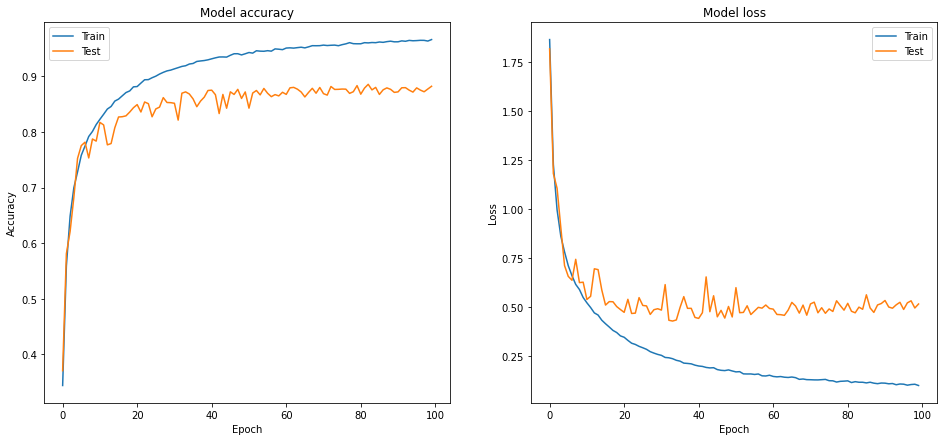

In [5]:
from src.model import SimpleNet

MODEL_NAME = '100epochs_baseline'

train_parameters = {
    'steps_per_epoch' : None,
    'epochs' : 100,
    'validation_data' : (x_test,y_test),
    'batch_size' : 100
}

TRAINING = False
SAVING = False

if TRAINING:
    model = SimpleNet()
    model.fit(x_train, y_train, **train_parameters)
    
if SAVING:
    model.save_weights(f'models/{MODEL_NAME}/model')
    model.save_training_history(f'training_history/{MODEL_NAME}.csv')
    model.save_training_plot(f'img/{MODEL_NAME}.svg')

# How signatures work

* Generate a sequence of random weights using the hash of the data as a seed to the random number generator.
* Replace the weights of the model by the generated random weights.
* Check signature matching by comparing the weights of the model with the weights of the signature.

In [6]:
from src.signature import Signature

f = lambda x : "Verified" if x else "Not verified"

model = SimpleNet()

sig = Signature(b'Some block information', 4096)
other_sig = Signature(b'Some other block information', 4096)

sig.sign(model)

print(f"Checking model against original signature : {f(sig.verify(model))}")
print(f"Checking model against another signature : {f(other_sig.verify(model))}")

other_sig.sign(model)

print(f"Checking model against original signature : {f(sig.verify(model))}")
print(f"Checking model against another signature : {f(other_sig.verify(model))}")

Checking model against original signature : Verified
Checking model against another signature : Not verified
Checking model against original signature : Not verified
Checking model against another signature : Verified


# Evaluate the signature hit after training

## Accuracy of pretrained model after signing

To validate the proof of work, we want to prevent transfer learning as much as possible. Here, we visualize the accuracy of a pretrained model directly after signing it. We observe an exponential decay with the percentage of signed neurons.

In [11]:
def signature_hit(baseline):
    hit = {
        'signature_size' : [],
        'model_ratio' : [],
        'accuracy' : [],
        'f1' : [],
        'loss' : [],
    }
    
    model_ratio = np.linspace(0, 0.1, 50)

    for ratio in tqdm(model_ratio):
        model = SimpleNet()
        model.load_weights(baseline).expect_partial()
        
        sig_size = int(ratio*model.n_weights())
        signature = Signature(b'Some block information', sig_size)
        signature.sign(model)
        assert signature.verify(model)
        loss, acc, f1 = model.evaluate(x_test, y_test, verbose=0)
        
        hit['model_ratio'].append(ratio)  
        hit['signature_size'].append(sig_size)
        hit['accuracy'].append(acc)
        hit['f1'].append(f1)
        hit['loss'].append(loss)
        
    return hit

In [64]:
from scipy.optimize import least_squares

def exp(params, t, b=0):
    return  params[0] + params[1] * np.exp(np.array(t) * params[2]) - b

def exp_fit(x, y):
    x0 = np.array([1.0, 1.0, 0.0]) # initialization vector
    return least_squares(exp, x0, loss='soft_l1', args=(x, y)).x

def fit_hit(data):
    sol = exp_fit(data["model_ratio"], data["accuracy"])
    print(sol)

    fig, ax = plt.subplots()
    
    ax.scatter(metrics["model_ratio"], metrics["accuracy"], label='Accuracy on test set')
    ax.plot(metrics["model_ratio"], exp(sol, metrics["model_ratio"]), label=f'{sol[0]:.1} + {sol[1]:.1} $e^{{{sol[2]:.0f}r}}$')
    ax.set(xlabel='Signature size / # of model parameters', ylabel='Accuracy', title="Pretrained model accuracy after applying signature")
    ax.legend(loc="upper right")
    
    return fig

100%|██████████| 50/50 [07:18<00:00,  8.77s/it]

[  0.12170502   0.78676307 -67.34353181]


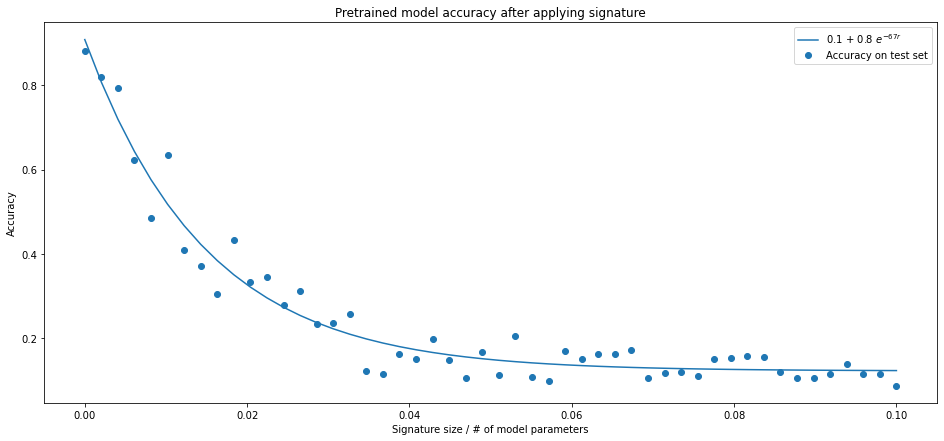

In [66]:
SAVING = False
BENCHMARK = True

if BENCHMARK:
    metrics = signature_hit(f'models/{MODEL_NAME}/model')
    pd.DataFrame(metrics).to_csv(f'signature_hit/{MODEL_NAME}_pretrained.csv')
    fig = fit_hit(metrics)
    fig.savefig(f'signature_hit/pretrained.svg')
else:
    metrics = pd.read_csv(f'signature_hit/{MODEL_NAME}_pretrained.csv')
    fig = fit_hit(metrics)
    if SAVING:
        fig.savefig(f'signature_hit/pretrained.svg')

## # of epochs to original accuracy

A typical transfer learning attack scenario would be to sign a pretrained model and retrain it to achieve its original accuracy. In order for the signature to be useful, it should be as efficient for the attacker to train the model from scratch as it is using this attack.

In [ ]:
baseline = f'models/{MODEL_NAME}/model'
TRAINING = True
SAVING = True

if TRAINING:
    model_ratio = np.linspace(0.1, 1.0, 10)
    for ratio in model_ratio[1:]: # PARTIAL
        model = SimpleNet()
        model.load_weights(baseline).expect_partial()
        signature_length = int(model.n_weights() * ratio)
        sig = Signature(b'Some block information', signature_length)
        model.fit(x_train, y_train, **train_parameters, signature=sig)
        if SAVING:
            model.save_training_history(f'training_history/sig_{ratio:.1f}_pretrained.csv')

Train model with signature of size 130692
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 85s 2ms/sample - loss: 1.2452 - accuracy: 0.6196 - f1_score: 0.6082 - val_loss: 0.6661 - val_accuracy: 0.7771 - val_f1_score: 0.7618
Epoch 2/100
50000/50000 [==============================] - 83s 2ms/sample - loss: 0.7027 - accuracy: 0.7647 - f1_score: 0.7559 - val_loss: 0.5415 - val_accuracy: 0.8150 - val_f1_score: 0.8034
Epoch 3/100
50000/50000 [==============================] - 83s 2ms/sample - loss: 0.5888 - accuracy: 0.8035 - f1_score: 0.7951 - val_loss: 0.5399 - val_accuracy: 0.8205 - val_f1_score: 0.8087
Epoch 4/100
50000/50000 [==============================] - 87s 2ms/sample - loss: 0.5212 - accuracy: 0.8239 - f1_score: 0.8161 - val_loss: 0.5433 - val_accuracy: 0.8258 - val_f1_score: 0.8113
Epoch 5/100
50000/50000 [==============================] - 84s 2ms/sample - loss: 0.4786 - accuracy: 0.8370 - f1_score: 0.8291 - val_loss: 0

50000/50000 [==============================] - 87s 2ms/sample - loss: 0.1755 - accuracy: 0.9393 - f1_score: 0.9365 - val_loss: 0.4401 - val_accuracy: 0.8789 - val_f1_score: 0.8704
Epoch 44/100
50000/50000 [==============================] - 84s 2ms/sample - loss: 0.1721 - accuracy: 0.9404 - f1_score: 0.9370 - val_loss: 0.4282 - val_accuracy: 0.8835 - val_f1_score: 0.8770
Epoch 45/100
50000/50000 [==============================] - 87s 2ms/sample - loss: 0.1709 - accuracy: 0.9408 - f1_score: 0.9375 - val_loss: 0.4963 - val_accuracy: 0.8680 - val_f1_score: 0.8586
Epoch 46/100
50000/50000 [==============================] - 84s 2ms/sample - loss: 0.1676 - accuracy: 0.9423 - f1_score: 0.9390 - val_loss: 0.4555 - val_accuracy: 0.8784 - val_f1_score: 0.8696
Epoch 47/100
50000/50000 [==============================] - 85s 2ms/sample - loss: 0.1665 - accuracy: 0.9426 - f1_score: 0.9394 - val_loss: 0.4735 - val_accuracy: 0.8738 - val_f1_score: 0.8659
Epoch 48/100
50000/50000 [======================

50000/50000 [==============================] - 88s 2ms/sample - loss: 0.1151 - accuracy: 0.9603 - f1_score: 0.9580 - val_loss: 0.5116 - val_accuracy: 0.8785 - val_f1_score: 0.8703
Epoch 86/100
50000/50000 [==============================] - 92s 2ms/sample - loss: 0.1224 - accuracy: 0.9584 - f1_score: 0.9559 - val_loss: 0.4691 - val_accuracy: 0.8853 - val_f1_score: 0.8782
Epoch 87/100
50000/50000 [==============================] - 87s 2ms/sample - loss: 0.1154 - accuracy: 0.9608 - f1_score: 0.9581 - val_loss: 0.4980 - val_accuracy: 0.8791 - val_f1_score: 0.8713
Epoch 88/100
50000/50000 [==============================] - 92s 2ms/sample - loss: 0.1134 - accuracy: 0.9624 - f1_score: 0.9600 - val_loss: 0.4792 - val_accuracy: 0.8827 - val_f1_score: 0.8758
Epoch 89/100
50000/50000 [==============================] - 93s 2ms/sample - loss: 0.1197 - accuracy: 0.9603 - f1_score: 0.9576 - val_loss: 0.4923 - val_accuracy: 0.8791 - val_f1_score: 0.8713
Epoch 90/100
50000/50000 [======================

50000/50000 [==============================] - 92s 2ms/sample - loss: 0.5305 - accuracy: 0.8187 - f1_score: 0.8104 - val_loss: 0.5209 - val_accuracy: 0.8249 - val_f1_score: 0.8168
Epoch 28/100
50000/50000 [==============================] - 99s 2ms/sample - loss: 0.5248 - accuracy: 0.8206 - f1_score: 0.8132 - val_loss: 0.5724 - val_accuracy: 0.8125 - val_f1_score: 0.7990
Epoch 29/100
50000/50000 [==============================] - 93s 2ms/sample - loss: 0.5114 - accuracy: 0.8252 - f1_score: 0.8171 - val_loss: 0.5332 - val_accuracy: 0.8226 - val_f1_score: 0.8135
Epoch 30/100
50000/50000 [==============================] - 89s 2ms/sample - loss: 0.5067 - accuracy: 0.8286 - f1_score: 0.8213 - val_loss: 0.5365 - val_accuracy: 0.8237 - val_f1_score: 0.8115
Epoch 31/100
50000/50000 [==============================] - 95s 2ms/sample - loss: 0.4964 - accuracy: 0.8313 - f1_score: 0.8238 - val_loss: 0.5462 - val_accuracy: 0.8206 - val_f1_score: 0.8089
Epoch 32/100
50000/50000 [======================

50000/50000 [==============================] - 87s 2ms/sample - loss: 0.3082 - accuracy: 0.8936 - f1_score: 0.8882 - val_loss: 0.4506 - val_accuracy: 0.8606 - val_f1_score: 0.8531
Epoch 70/100
50000/50000 [==============================] - 84s 2ms/sample - loss: 0.3010 - accuracy: 0.8958 - f1_score: 0.8909 - val_loss: 0.4365 - val_accuracy: 0.8671 - val_f1_score: 0.8597
Epoch 71/100
50000/50000 [==============================] - 84s 2ms/sample - loss: 0.2984 - accuracy: 0.8984 - f1_score: 0.8931 - val_loss: 0.4682 - val_accuracy: 0.8622 - val_f1_score: 0.8530
Epoch 72/100
50000/50000 [==============================] - 86s 2ms/sample - loss: 0.2985 - accuracy: 0.8967 - f1_score: 0.8916 - val_loss: 0.4380 - val_accuracy: 0.8662 - val_f1_score: 0.8587
Epoch 73/100
50000/50000 [==============================] - 88s 2ms/sample - loss: 0.2969 - accuracy: 0.8978 - f1_score: 0.8925 - val_loss: 0.4281 - val_accuracy: 0.8718 - val_f1_score: 0.8645
Epoch 74/100
50000/50000 [======================

# Evaluate the signature hit during training

While it is important that a signed pretrained model does not perform well, we must also show that model can be trained with the signature. 

In [ ]:
TRAINING = True
SAVING = True

if TRAINING:
    model_ratio = np.linspace(0.1, 1.0, 10)
    for ratio in model_ratio:
        model = SimpleNet()
        signature_length = int(model.n_weights() * ratio)
        sig = Signature(b'Some block information', signature_length)
        model.fit(x_train, y_train, **train_parameters, signature=sig)
        if SAVING:
            model.save_training_history(f'training_history/sig_{ratio:.1f}.csv')

# Plotting results

In [ ]:
def plot_results(scatter=False, regression=False, line=False, suffix=''):
    if not scatter and not regression and not line:
        raise ValueError("Set [scatter|regression|line] to True")
    
    fig, ax = plt.subplots(1, 2)
    colormap = cm.cividis_r
    model_ratio = np.linspace(0.1, 1.0, 10)
    
    for ratio in model_ratio:
        data = pd.read_csv(f'training_history/sig_{ratio:.1f}{suffix}.csv')
        data.index += 1
        color = np.array(colormap(ratio))
        
        if regression:
            line_fit = exp_fit(data.index, data['val_accuracy'])
            ax[0].plot(data.index, exp(data.index, *line_fit), label=f'{ratio:.1f}', c=color)
            
        if scatter:
            ax[0].scatter(data.index, data['val_accuracy'], c=color.reshape(1, -1))
        
        if line:
            ax[0].plot(data.index, data['val_accuracy'], label=f'{ratio:.1f}', c=color)
            
        ax[0].set(xlabel='Epochs', ylabel='Validation accuracy', title='Accuracy for % of model frozen')
        ax[0].legend()
        
        if regression:
            line_fit = exp_fit(data.index, data['val_f1_score'])
            ax[1].plot(data.index, exp(data.index, *line_fit), label=f'{ratio:.1f}', c=colormap(ratio))
            
        if scatter:
            ax[1].scatter(data.index, data['val_f1_score'], c=color.reshape(1, -1))
            
        if line:
            ax[1].plot(data.index, data['val_f1_score'], label=f'{ratio:.1f}', c=colormap(ratio))
        
        ax[1].set(xlabel='Epochs', ylabel='Validation F1 score', title='F1 score as % of model frozen')
        ax[1].legend()
    
    return ax, fig

In [ ]:
_, fig = plot_results(line=True)

SAVING = False
if SAVING:
    fig.savefig('signature_hit/during_training.svg')

In [ ]:
_, fig = plot_results(line=True, suffix='_pretrained')

SAVING = False
if SAVING:
    fig.savefig('signature_hit/after_training.svg')